In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../../data/AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
homework_cols = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365', 'neighbourhood_group', 'room_type']
df = df[homework_cols]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
 8   neighbourhood_group             48895 non-null  object 
 9   room_type                       48895 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


In [6]:
df = df.fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
 8   neighbourhood_group             48895 non-null  object 
 9   room_type                       48895 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


# Q1

What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [8]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Answer: Manhattan

Split the data
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value ('price') is not in your dataframe.

In [9]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [11]:
y_train = df_train.price.values
y_val = df_val.price.values
del df_train['price']
del df_val['price']

In [12]:
df_train.shape[0], df_val.shape[0], df_test.shape[0]

(29337, 9779, 9779)

# Q2

Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

In [13]:
df_train.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


In [14]:
df.corr().abs().unstack().sort_values(ascending=False)[:10]

availability_365                availability_365                  1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
longitude                       longitude                         1.000000
price                           price                             1.000000
minimum_nights                  minimum_nights                    1.000000
number_of_reviews               number_of_reviews                 1.000000
reviews_per_month               reviews_per_month                 1.000000
latitude                        latitude                          1.000000
reviews_per_month               number_of_reviews                 0.589407
number_of_reviews               reviews_per_month                 0.589407
dtype: float64

Answer: reviews_per_month and number_of_reviews

Make price binary
We need to turn the price variable from numeric into binary.
Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

In [15]:
y_train

array([ 99,  57,  70, ..., 299,  65,  92], dtype=int64)

In [16]:
above_average = np.where(y_train >= 152, 1, 0)
above_average_val = np.where(y_val >= 152, 1, 0)
above_average

array([0, 0, 0, ..., 1, 0, 0])

# Q3

Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
Which of these two variables has bigger score?
Round it to 2 decimal digits using round(score, 2)

In [17]:
from sklearn.metrics import mutual_info_score

neighbourhood_group, room_type

In [18]:
df_train[['neighbourhood_group', 'room_type']]

,neighbourhood_group,room_type
13575,Brooklyn,Entire home/apt
48476,Manhattan,Private room
44499,Bronx,Entire home/apt
17382,Brooklyn,Entire home/apt
14638,Manhattan,Private room
...,...,...
13198,Brooklyn,Private room
14583,Brooklyn,Private room
6168,Manhattan,Private room
12248,Brooklyn,Private room


In [19]:
def calculate_mi(series):
    return mutual_info_score(series, above_average)

df_mi = df_train[['neighbourhood_group', 'room_type']].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
room_type,0.143226
neighbourhood_group,0.046506


,MI
room_type,0.143226
neighbourhood_group,0.046506


# Q4

- Now let's train a logistic regression
- Remember that we have two categorical variables in the data. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
- model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
- Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29337 entries, 13575 to 20523
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        29337 non-null  float64
 1   longitude                       29337 non-null  float64
 2   minimum_nights                  29337 non-null  int64  
 3   number_of_reviews               29337 non-null  int64  
 4   reviews_per_month               29337 non-null  float64
 5   calculated_host_listings_count  29337 non-null  int64  
 6   availability_365                29337 non-null  int64  
 7   neighbourhood_group             29337 non-null  object 
 8   room_type                       29337 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 2.2+ MB


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [22]:
train_dict = df_train.to_dict(orient='records')
train_dict_val = df_val.to_dict(orient='records')

In [23]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [24]:
X_train = dv.transform(train_dict)
X_val = dv.transform(train_dict_val)
X_train.shape

(29337, 15)

In [25]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, above_average)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

In [26]:
y_pred = model.predict_proba(X_train)[:, 1]
y_pred_val = model.predict_proba(X_val)[:, 1]

In [27]:
above = y_pred > 0.5
above_val = y_pred_val > 0.5

In [28]:
above_val

array([False,  True, False, ..., False, False,  True])

In [29]:
print("On train data:", (above_average == above).mean())
print("On val data:", (above_average_val == above_val).mean())

On train data: 0.789208167160923
On val data: 0.7864812353001329


In [30]:
print("On train data:", (above_average == above).mean().round(2))
print("On val data:", (above_average_val == above_val).mean().round(2))

On train data: 0.79
On val data: 0.79


# Q5

- We have 9 features: 7 numerical features and 2 categorical.
- Let's find the least useful one using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
- neighbourhood_group
- room_type
- number_of_reviews
- reviews_per_month
- note: the difference doesn't have to be positive

In [31]:
df_train.shape[1],df_train.columns

(9, Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365', 'neighbourhood_group', 'room_type'],
       dtype='object'))

In [32]:
res = {}
res_val = {}
for c in df_train.columns:
    train_dict = df_train.drop([c], axis = 1).to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    X_val = dv.transform(train_dict_val)
    X_train.shape
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, above_average);
    y_pred = model.predict_proba(X_train)[:, 1]
    y_pred_val = model.predict_proba(X_val)[:, 1]
    above = y_pred > 0.5
    above_val = y_pred_val > 0.5
    res[c] = (above_average == above).mean()
    res_val[c] = (above_average_val == above_val).mean()

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

In [33]:
res

{'latitude': 0.7886968674370249,
 'longitude': 0.7887991273818046,
 'minimum_nights': 0.7874356614514095,
 'number_of_reviews': 0.7878106145822681,
 'reviews_per_month': 0.7886286941405052,
 'calculated_host_listings_count': 0.7880492211200872,
 'availability_365': 0.7849473361284385,
 'neighbourhood_group': 0.7485087091386304,
 'room_type': 0.7210689572894298}

In [34]:
res_val

{'latitude': 0.7863789753553533,
 'longitude': 0.7867880151344718,
 'minimum_nights': 0.7854586358523367,
 'number_of_reviews': 0.7868902750792515,
 'reviews_per_month': 0.7857654156866756,
 'calculated_host_listings_count': 0.7866857551896922,
 'availability_365': 0.7815727579507107,
 'neighbourhood_group': 0.7509970344616014,
 'room_type': 0.7162286532365273}

In [35]:
for c in ['neighbourhood_group','room_type','number_of_reviews','reviews_per_month']:
    print(c, res[c]-0.79)

neighbourhood_group -0.0414912908613696
room_type -0.06893104271057027
number_of_reviews -0.0021893854177319483
reviews_per_month -0.0013713058594948535


In [36]:
for c in ['neighbourhood_group','room_type','number_of_reviews','reviews_per_month']:
    print(c, res_val[c]-0.79)

neighbourhood_group -0.03900296553839866
room_type -0.07377134676347274
number_of_reviews -0.003109724920748569
reviews_per_month -0.004234584313324463


Answer: 'number_of_reviews'

# Q6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
- If there are multiple options, select the smallest alpha.

In [37]:
df[df.price==0]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
23161,40.69023,-73.95428,0,4,1,0.05,4,28,Brooklyn,Private room
25433,40.83296,-73.88668,0,2,55,2.56,4,127,Bronx,Private room
25634,40.69467,-73.92433,0,2,16,0.71,5,0,Brooklyn,Private room
25753,40.72462,-73.94072,0,2,12,0.53,2,0,Brooklyn,Private room
25778,40.70838,-73.94645,0,5,3,0.15,1,73,Brooklyn,Entire home/apt
25794,40.68173,-73.91342,0,1,93,4.28,6,176,Brooklyn,Private room
25795,40.68279,-73.91170,0,1,95,4.37,6,232,Brooklyn,Private room
25796,40.68258,-73.91284,0,1,95,4.35,6,222,Brooklyn,Private room
26259,40.75091,-73.97597,0,3,0,0.00,1,0,Manhattan,Entire home/apt
26841,40.69211,-73.90670,0,30,2,0.11,6,333,Brooklyn,Shared room


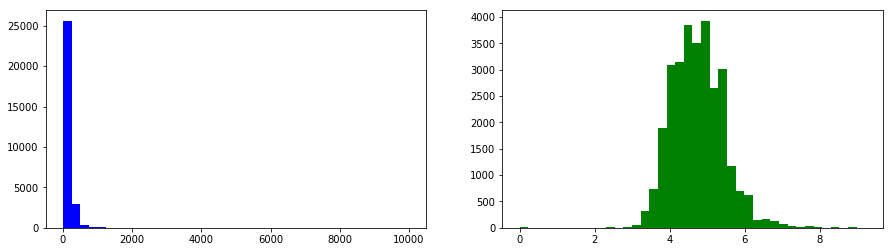

In [38]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].hist(y_train, bins=40, color='blue', alpha=1);
ax[1].hist(np.log1p(y_train), bins=40, color='green', alpha=1);

In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
y = np.log1p(y_train)

train_dict = df_train.to_dict(orient='records')
train_dict_val = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_val = dv.transform(train_dict_val)

res = {}
res_val = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    train_dict = df_train.drop([c], axis = 1).to_dict(orient='records')
    X_train.shape
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train);
    y_pred = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    rmse = mean_squared_error(y_train, y_pred)
    rmse_val = mean_squared_error(y_val, y_pred_val)
    res[alpha] = rmse.round(3)
    res_val[alpha] = rmse_val.round(3)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.50558e-21): result may not be accurate.
  overwrite_a=True).T


In [40]:
res_val

{0: 44902.771, 0.01: 44902.768, 0.1: 44902.749, 1: 44902.911, 10: 44922.801}

In [41]:
res

{0: 58739.061, 0.01: 58739.061, 0.1: 58739.065, 1: 58739.438, 10: 58760.517}

In [42]:
min(res_val, key=res_val.get)

0.1

Answer: 0.1